# Ejemplo de uso de SMOTE para balancear datos

## Paso previo: Instalación de Imbalanced-learn

En la terminal/cmd:

```
pip install -U imbalanced-learn
```

Requerimientos minimos:
`Numpy`, `Scipy` y `Scikit-learn`

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

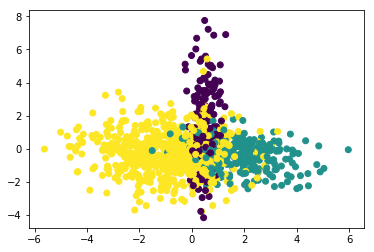

In [2]:
# Paso 1: Generar un dataset
X, Y = make_classification(n_classes=3, weights=[0.15,0.25,0.6],
                           n_informative = 3, n_features= 25,
                           n_clusters_per_class=1, n_samples=1000,
                           random_state=10)

#Y para visualizarlo, usaremos PCA para reducir dimensionalidad
pca = PCA(n_components=2)

X_viz =  pca.fit_transform(X)


plt.scatter(X_viz[:,0],X_viz[:,1], c=Y)

In [3]:
#Paso 2: Instanciamos SMOTE
sm = SMOTE(kind="regular")
X_res, Y_res = sm.fit_sample(X,Y)
print("Teniamos originalmente")
print(np.bincount(Y))
print("Con smote llegaron a")
print(np.bincount(Y_res))

Teniamos originalmente
[148 251 601]
Con smote llegaron a
[601 601 601]


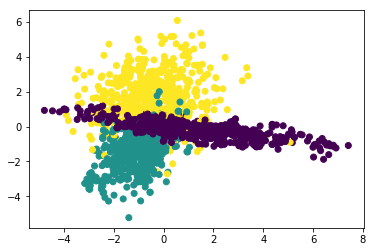

In [4]:
#Paso 3: Vamos a ver como se distribuyeron las nuevas muestras
pca2 = PCA(n_components=2)
X_rviz = pca2.fit_transform(X_res)

plt.scatter(X_rviz[:,0], X_rviz[:,1], c=Y_res)

In [5]:
#Para evaluar el desempeño con un clasificador tipo MLP
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [9]:
for (x,y),tipo in zip([(X,Y),(X_res,Y_res)],["Desbalanceado","Balanceado"]):
    mlp = MLPClassifier(hidden_layer_sizes=(20,), activation="relu")
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, train_size=0.7, test_size=0.3)
    mlp.fit(Xtrain,Ytrain)
    
    y_pred = mlp.predict(Xtest)
    print(tipo)
    print(classification_report(Ytest,y_pred))

C:\Users\diego\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Desbalanceado
             precision    recall  f1-score   support

          0       0.80      0.50      0.62        48
          1       0.78      0.78      0.78        93
          2       0.80      0.89      0.84       159

avg / total       0.79      0.79      0.79       300

Balanceado
             precision    recall  f1-score   support

          0       0.84      0.96      0.90       178
          1       0.92      0.91      0.91       174
          2       0.93      0.81      0.86       189

avg / total       0.90      0.89      0.89       541

